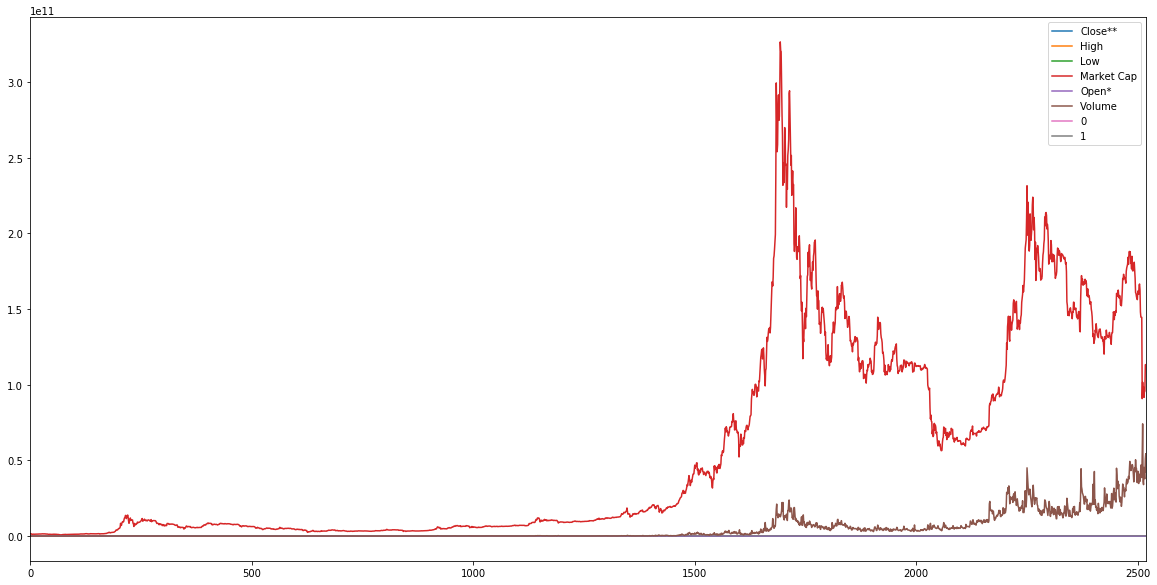

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

bitcoin_price = pd.read_pickle('../data/bitcoin_price_pickle.pkl')
bitcoin_price.plot(figsize=(20, 10))

In [16]:
bitcoin_price

,Close**,Date,High,Low,Market Cap,Open*,Volume,0,1
0,134.21,"Apr 28, 2013",135.98,132.10,1.488567e+09,135.30,0.000000e+00,NaN,NaN
1,144.54,"Apr 29, 2013",147.49,134.00,1.603769e+09,134.44,0.000000e+00,NaN,NaN
2,139.00,"Apr 30, 2013",146.93,134.05,1.542813e+09,144.00,0.000000e+00,NaN,NaN
3,116.99,"May 01, 2013",139.89,107.72,1.298955e+09,139.00,0.000000e+00,NaN,NaN
4,105.21,"May 02, 2013",125.60,92.28,1.168517e+09,116.38,0.000000e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2515,5225.63,"Mar 17, 2020",5371.35,4981.91,9.549994e+10,5002.58,3.862264e+10,NaN,NaN
2516,5238.44,"Mar 18, 2020",5331.83,5069.34,9.574072e+10,5227.11,3.787880e+10,NaN,NaN
2517,6191.19,"Mar 19, 2020",6329.74,5236.97,1.131621e+11,5245.42,5.100073e+10,NaN,NaN
2518,6198.78,"Mar 20, 2020",6844.26,5865.78,1.133092e+11,6191.65,5.444298e+10,NaN,NaN


In [34]:
bitcoin_price['date'] =  pd.to_datetime(bitcoin_price['Date'])
bitcoin_price.set_index(['Date'])

,Close**,High,Low,Market Cap,Open*,Volume,0,1,date
Date,,,,,,,,,
"Apr 28, 2013",134.21,135.98,132.10,1.488567e+09,135.30,0.000000e+00,NaN,NaN,2013-04-28
"Apr 29, 2013",144.54,147.49,134.00,1.603769e+09,134.44,0.000000e+00,NaN,NaN,2013-04-29
"Apr 30, 2013",139.00,146.93,134.05,1.542813e+09,144.00,0.000000e+00,NaN,NaN,2013-04-30
"May 01, 2013",116.99,139.89,107.72,1.298955e+09,139.00,0.000000e+00,NaN,NaN,2013-05-01
"May 02, 2013",105.21,125.60,92.28,1.168517e+09,116.38,0.000000e+00,NaN,NaN,2013-05-02
...,...,...,...,...,...,...,...,...,...
"Mar 17, 2020",5225.63,5371.35,4981.91,9.549994e+10,5002.58,3.862264e+10,NaN,NaN,2020-03-17
"Mar 18, 2020",5238.44,5331.83,5069.34,9.574072e+10,5227.11,3.787880e+10,NaN,NaN,2020-03-18
"Mar 19, 2020",6191.19,6329.74,5236.97,1.131621e+11,5245.42,5.100073e+10,NaN,NaN,2020-03-19


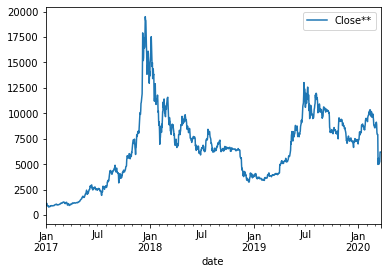

In [35]:
# show data from 2017-01-01 to 2020-03-21
fig = plt.figure()
ax = plt.subplot(111)
bitcoin_price.plot(x='date',y='Close**',ax=ax)
ax.set_xlim('2017-01-01','2020-03-21')
plt.show()

In [67]:
# Truncate date to a the data from 2017-01-01 to 2020-03-21 because the data before 2017 is quite stable
split_date ='2017-01-01'
df_2017 = bitcoin_price.loc[bitcoin_price['date'] >= split_date]
df_2017 = df_2017[['Close**', 'date']]
df_2017 = df_2017.dropna()
df_2017.set_index('date')

,Close**
date,
2017-01-01,998.33
2017-01-02,1021.75
2017-01-03,1043.84
2017-01-04,1154.73
2017-01-05,1013.38
...,...
2020-03-17,5225.63
2020-03-18,5238.44
2020-03-19,6191.19


In [68]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf

def test_stationarity(timeseries, window_size, data_col_name):
    moving_avg = timeseries.rolling(window=window_size).mean()
    moving_std = timeseries.rolling(window=window_size).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(moving_avg, color='red', label='Rolling Mean')
    std = plt.plot(moving_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dicky Fuller Test:')
    dftest = adfuller(timeseries[data_col_name], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

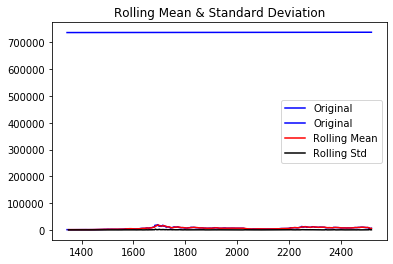

Results of Dicky Fuller Test:
Test Statistic                   -2.550223
p-value                           0.103728
#Lags Used                       20.000000
Number of Observations Used    1155.000000
Critical Value (1%)              -3.436024
Critical Value (5%)              -2.864046
Critical Value (10%)             -2.568104
dtype: float64


In [69]:
test_stationarity(df_2017, 7, 'Close**')

In [71]:
df_2017.set_index('date', inplace=True)

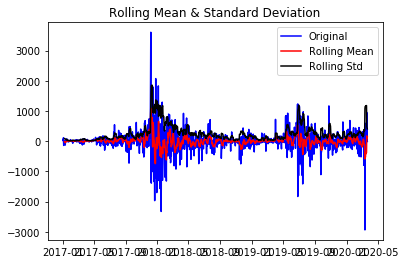

Results of Dicky Fuller Test:
Test Statistic                -6.549555e+00
p-value                        8.921806e-09
#Lags Used                     1.900000e+01
Number of Observations Used    1.155000e+03
Critical Value (1%)           -3.436024e+00
Critical Value (5%)           -2.864046e+00
Critical Value (10%)          -2.568104e+00
dtype: float64


In [76]:
# Test value smaller than critical value. d = 1
df_2017_diff = df_2017.diff()
df_2017_diff.dropna(inplace=True)
test_stationarity(df_2017_diff, 7, 'Close**')

In [77]:
df_2017_diff

,Close**
date,
2017-01-02,23.42
2017-01-03,22.09
2017-01-04,110.89
2017-01-05,-141.35
2017-01-06,-111.18
...,...
2020-03-17,211.15
2020-03-18,12.81
2020-03-19,952.75


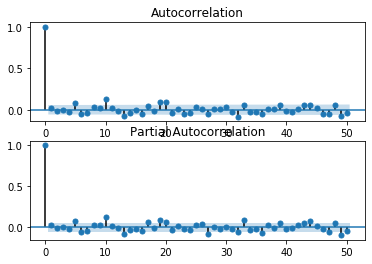

<Figure size 800x480 with 0 Axes>

In [140]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(df_2017_diff, lags=100)
# plt.show()
# plot_pacf(df_2017_diff, lags=100)
# plt.show()

import statsmodels.api as sm

fig, ax = plt.subplots(2, 1)
fig = sm.graphics.tsa.plot_acf(df_2017_diff, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(df_2017_diff, lags=50, ax=ax[1])
plt.show()

In [88]:
# auto_arima
# https://www.alkaline-ml.com/pmdarima/auto_examples/example_simple_fit.html

import pmdarima as pm

def auto_arima(dataframe, if_seasonal, m):
    df_split_point = int(len(dataframe) * 0.7)
    df_train, df_test = dataframe[:df_split_point], dataframe[df_split_point:]
    arima = pm.auto_arima(df_train, error_action='ignore', trace=1, seasonal=if_seasonal, m=m)
    x = np.arange(df_test.shape[0])
    plt.scatter(x, df_test, marker='x')
    plt.plot(x, arima.predict(n_periods=df_test.shape[0]))
    plt.title('Actual test samples vs. forecasts')
    plt.show()

/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=12061.776, BIC=12099.470, Fit time=2.012 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 7); AIC=12073.752, BIC=12083.175, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 7); AIC=12069.698, BIC=12088.545, Fit time=0.117 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=12068.959, BIC=12087.806, Fit time=0.164 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 7); AIC=12068.483, BIC=12101.465, Fit time=1.363 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 1, 7); AIC=12063.679, BIC=12106.085, Fit time=3.707 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 0, 7); AIC=12069.707, BIC=12102.690, Fit time=1.263 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 7); AIC=12063.720, BIC=12106.125, Fit time=3.407 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 7); AIC=12072.910, BIC=12101.180, Fit time=0.686 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressi

Fit ARIMA: order=(2, 1, 2) seasonal_order=(2, 0, 2, 7); AIC=12064.563, BIC=12111.680, Fit time=4.075 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 7); AIC=12059.876, BIC=12092.858, Fit time=1.943 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=12057.933, BIC=12086.204, Fit time=1.291 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=12063.614, BIC=12082.461, Fit time=0.564 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 7); AIC=12066.131, BIC=12089.690, Fit time=0.678 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=12059.983, BIC=12092.966, Fit time=2.126 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 0, 7); AIC=12066.931, BIC=12090.489, Fit time=0.598 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 2, 7); AIC=12060.022, BIC=12093.004, Fit time=2.545 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 7); AIC=12069.014, BIC=12087.861, Fit time=0.186 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 2, 7); AIC=12061.095, BIC=12098.789, Fit time=3.087 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=12060.189, BIC=12083.748, Fit time=0.892 seconds


/opt/anaconda3/envs/forDA_kernel/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=12059.888, BIC=12092.870, Fit time=1.473 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 1, 7); AIC=12060.408, BIC=12083.967, Fit time=0.747 seconds
Total fit time: 32.962 seconds


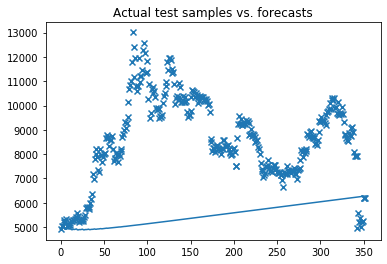

In [89]:
# m = 7 means daily observation 
# https://alkaline-ml.com/pmdarima/tips_and_tricks.html
auto_arima(df_2017, True, 7)

In [116]:
# int(len(df_2017)*0.7)
# print(df_2017.iloc[823])
df_2017_no_index = df_2017.reset_index(drop=False)
split_date ='2019-04-04'
train_2017 = df_2017_no_index.loc[df_2017_no_index['date'] < split_date]
test_2017 = df_2017_no_index.loc[df_2017_no_index['date'] >= split_date]
train_2017

,date,Close**
0,2017-01-01,998.33
1,2017-01-02,1021.75
2,2017-01-03,1043.84
3,2017-01-04,1154.73
4,2017-01-05,1013.38
...,...,...
818,2019-03-30,4106.66
819,2019-03-31,4105.40
820,2019-04-01,4158.18
821,2019-04-02,4879.88


In [117]:
print(np.array(train_2017['Close**']))

[  998.33  1021.75  1043.84  1154.73  1013.38   902.2    908.59   911.2
   902.83   907.68   777.76   804.83   823.98   818.41   821.8    831.53
   907.94   886.62   899.07   895.03   921.79   924.67   921.01   892.69
   901.54   917.59   919.75   921.59   919.5    920.38   970.4    989.02
  1011.8   1029.91  1042.9   1027.34  1038.15  1061.35  1063.07   994.38
   988.67  1004.45   999.18   990.64  1004.55  1007.48  1027.44  1046.21
  1054.42  1047.87  1079.98  1115.3   1117.44  1166.72  1173.68  1143.84
  1165.2   1179.97  1179.97  1222.5   1251.01  1274.99  1255.15  1267.12
  1272.83  1223.54  1150.    1188.49  1116.72  1175.83  1221.38  1231.92
  1240.    1249.61  1187.81  1100.23   973.82  1036.74  1054.23  1120.54
  1049.14  1038.59   937.52   972.78   966.72  1045.77  1047.15  1039.97
  1026.43  1071.79  1080.5   1102.17  1143.81  1133.25  1124.78  1182.68
  1176.9   1175.95  1187.87  1187.13  1205.01  1200.37  1169.28  1167.54
  1172.52  1182.94  1193.91  1211.67  1210.29  1229.

In [108]:
test_2017

,date,Close**
823,2019-04-04,4922.80
824,2019-04-05,5036.68
825,2019-04-06,5059.82
826,2019-04-07,5198.90
827,2019-04-08,5289.77
...,...,...
1171,2020-03-17,5225.63
1172,2020-03-18,5238.44
1173,2020-03-19,6191.19
1174,2020-03-20,6198.78


In [90]:
# selected hyperparameters based on AIC and BIC
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=12057.933, BIC=12086.204, Fit time=1.291 seconds
# Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 0, 1, 7); AIC=12059.983, BIC=12092.966, Fit time=2.126 seconds
# Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 0, 1, 7); AIC=12059.888, BIC=12092.870, Fit time=1.473 seconds


In [168]:
# Forecasting
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(np.array(train_2017['Close**']),order=(2,1,1), seasonal_order=(1,0,1,7))
results = mod.fit(max_iter = 50, method = 'powell')
print(results)

Optimization terminated successfully.
         Current function value: 7.328098
         Iterations: 1
         Function evaluations: 66


In [169]:
# Get forecast result
forecast = model.get_forecast(steps = 353)

In [170]:
res = forecast.predicted_mean
print(len(res))

353


In [171]:
from sklearn.metrics import r2_score
print('R2 score: %f' % r2_score(np.array(test_2017['Close**']), res))

R2 score: -4.342996


In [142]:
def convert_scientific_notation_to_decimals(pValue):
#     pValue = float('8.921806e-09')
    # and now with 'rounding'
    print("{:.8f}".format(pValue))

In [162]:
# ToDo a grid search for hyper-parameters
# train, test datasets are train_2017, test_2017
import itertools
def grid_search_space(p, d, q, seasonal_num):
    models = list()
    # t_params: n-no trend, c-constant, t-linear, ct-constant with linear trend
    t_params = ['n','c','t','ct']
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = list(itertools.product(p, d, q, seasonal_num))
    return pdq, seasonal_pdq

# grid_search_space(range(0, 6), [1], range(0, 6), [7, 8])
p = range(0, 6)
d = [1]
q = range(0, 6)
seasonal_num = range(7, 8)
pdq, seasonal_pdq = grid_search_space(p, d, q, seasonal_num)
hyper_param = list(itertools.product(pdq, seasonal_pdq))
print('hyper_param len is ')
print(len(hyper_param))
print(hyper_param)

hyper_param len is 
1296
[((0, 1, 0), (0, 1, 0, 7)), ((0, 1, 0), (0, 1, 1, 7)), ((0, 1, 0), (0, 1, 2, 7)), ((0, 1, 0), (0, 1, 3, 7)), ((0, 1, 0), (0, 1, 4, 7)), ((0, 1, 0), (0, 1, 5, 7)), ((0, 1, 0), (1, 1, 0, 7)), ((0, 1, 0), (1, 1, 1, 7)), ((0, 1, 0), (1, 1, 2, 7)), ((0, 1, 0), (1, 1, 3, 7)), ((0, 1, 0), (1, 1, 4, 7)), ((0, 1, 0), (1, 1, 5, 7)), ((0, 1, 0), (2, 1, 0, 7)), ((0, 1, 0), (2, 1, 1, 7)), ((0, 1, 0), (2, 1, 2, 7)), ((0, 1, 0), (2, 1, 3, 7)), ((0, 1, 0), (2, 1, 4, 7)), ((0, 1, 0), (2, 1, 5, 7)), ((0, 1, 0), (3, 1, 0, 7)), ((0, 1, 0), (3, 1, 1, 7)), ((0, 1, 0), (3, 1, 2, 7)), ((0, 1, 0), (3, 1, 3, 7)), ((0, 1, 0), (3, 1, 4, 7)), ((0, 1, 0), (3, 1, 5, 7)), ((0, 1, 0), (4, 1, 0, 7)), ((0, 1, 0), (4, 1, 1, 7)), ((0, 1, 0), (4, 1, 2, 7)), ((0, 1, 0), (4, 1, 3, 7)), ((0, 1, 0), (4, 1, 4, 7)), ((0, 1, 0), (4, 1, 5, 7)), ((0, 1, 0), (5, 1, 0, 7)), ((0, 1, 0), (5, 1, 1, 7)), ((0, 1, 0), (5, 1, 2, 7)), ((0, 1, 0), (5, 1, 3, 7)), ((0, 1, 0), (5, 1, 4, 7)), ((0, 1, 0), (5, 1, 5, 7)), ((

In [190]:
# grid search
# walk forward https://towardsdatascience.com/time-series-forecasting-with-a-sarima-model-db051b7ae459
# int(len(df_2017)*0.7)
# print(df_2017.iloc[823])
def SARIMA_fit(train, pdq, seasonal_pdq, forecast_nums):
    model = sm.tsa.statespace.SARIMAX(np.array(train), order=pdq, seasonal_order=seasonal_pdq).fit(max_iter=50, method='powell')
    forecast = model.get_forecast(steps=forecast_nums)
    return forecast

# forecast = SARIMA_fit(train_2017['Close**'], hyper_param[10][0], hyper_param[10][1], 353)
# print(forecast.predicted_mean)

def SARIMA_walk_forecast(history, order, sorder):
    model = sm.tsa.statespace.SARIMAX(np.array(train), order=pdq, seasonal_order=seasonal_pdq).fit(max_iter=50, method='powell')
    model_fit = model.fit(disp=False)
    #     one step forecast
    forecast = model.get_forecast(steps=forecast_nums)
    return yhat[0]

In [222]:
def walk_forward_arima_forecast(data, split_point, step, pdq, seasonal_pdq):
    prediction = []
    small_step = 0
    train = data[:split_point]
    test = data[split_point:]
    while len(test) > step:
        train = data[:split_point+small_step]
        test = data[split_point+small_step:]
        forecast = SARIMA_fit(train, pdq, seasonal_pdq, len(test))
        yhat = forecast.predicted_mean
        prediction.extend(yhat[:step].tolist())
        small_step += step
    return prediction


step = 7
data = df_2017_no_index['Close**'].values.tolist()
split_point = int(len(data)*0.7)
# pdq, seasonal_pdq = hyper_param[10][0], hyper_param[10][1]
pdq, seasonal_pdq = (1, 1, 1), (1, 0, 1, 7)
forecast = walk_forward_arima_forecast(data, split_point, step, pdq, seasonal_pdq)

print('The prediction is ')
print(forecast)
print('The reality is ')
print(data[split_point:])
print('R2 score: %f' % r2_score(np.array(data[split_point:]), forecast))

Optimization terminated successfully.
         Current function value: 7.328039
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7.324133
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7.320564
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7.316716
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7.313003
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7.309458
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
         Current function value: 7.312764
         Iterations: 1
         Function evaluations: 56
Optimization terminated successfully.
   

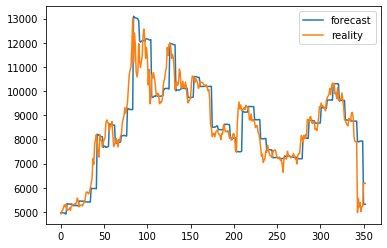

In [232]:
y_axis = []
for i in range(0, len(forecast)):    
    y_axis.append(i)
    i+=1

plt.plot(y_axis, forecast, label='forecast')
plt.plot(y_axis, data[split_point:], label='reality')
plt.legend()

In [254]:
train_fb = train_2017.rename(columns={'date': 'ds', 'Close**': 'y'})
test_fb = test_2017.rename(columns={'date': 'ds', 'Close**': 'y'})

In [255]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_fb)
future = m.make_future_dataframe(periods=len(test_fb))
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1171,2020-03-17
1172,2020-03-18
1173,2020-03-19
1174,2020-03-20
1175,2020-03-21


In [256]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1171,2020-03-17,-2013.568140,-13855.065230,10051.936025
1172,2020-03-18,-2079.155607,-13781.047288,9848.802829
1173,2020-03-19,-2134.419643,-14192.104869,10010.129583
1174,2020-03-20,-2173.027064,-13724.813825,10165.342166
1175,2020-03-21,-2179.528069,-14408.698780,9876.564250


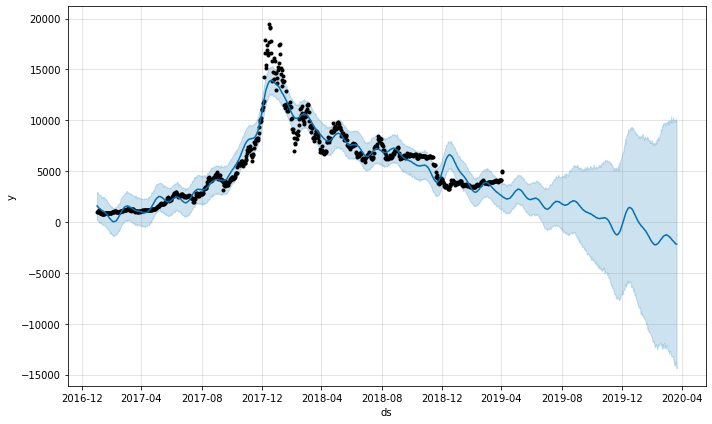

In [258]:
fig1 = m.plot(forecast)

In [266]:
fb_forecast = forecast[['yhat']][-353:]

In [286]:
fb_forecast_arr = np.array(fb_forecast).flatten()
train_arr = np.array(test_2017['Close**'])
if len(fb_forecast_arr) == len(train_arr):
    print('R2 score: %f' % r2_score(fb_forecast_arr, train_arr))
else:
    print('Data error')

R2 score: -27.435142
